# Convolutional Neural Network.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section: 1
  *   In this section, we will implement and observe the operations of various layers used to build the CNN.
  *   By the end of the workshop, we expect you to be able to:
      1.   Explain the Convolution operation
      2.   Explain the pooling operation
      3.   Get familiar with various hyperparameters i.e. stride, padding

*   Section: 2
  *   In this section we will compile all the learning from section 1 to build a basic Convolutional Neural Network using Keras and Tensorflow.
  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Convolution Summary:

We convolve (slide) a small matrix also known as Filter/kernel, performing element wise matrix multiplications to produce filter-map.

  *   Objective of a convolution operations:
        1.   Apply a set of weights-a filter- to extract local features.
        2.   Use Multiple filters to extract different features.
        3.   Spatially share parameters of each filter.

Mathematically it perform following:
$$ conv(I,K)_{xy} = ∑_{i=1}^{h}\sum_{j=1}^{w}K_{ij}.I_{x+i-1,y+j-1} \tag{1} $$

Where:
- $I$ input image matrix..
-$K$ kernel/Filter used to perform convolution.

Hyper-parameters in Convolution Operations:
*   Number of Filters(K)
*   Size of Filters(F)
*   Stride(S)
*   amount of zero padding(P)

Output Dimensions is given by:

\begin{align}
\mathbf{O}  = \frac{W_{in} -f + 2p}{s} + 1 \tag{2}
\end{align}

### Exercise-1.

Perform following Convolution Operations:

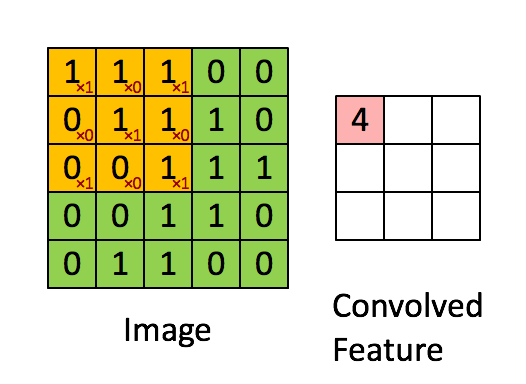

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
# Defining the input matrix as above using np.array function.
I = np.array([[1, 1, 1, 0, 0], [0, 1, 1, 1 ,0], [0, 0, 1, 1, 1,], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]])

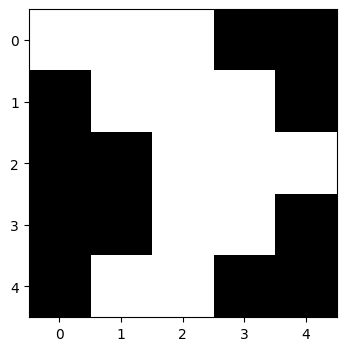

In [ ]:
# Visualizing the input.
plt.imshow(I)

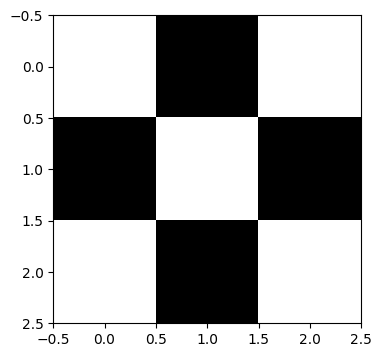

In [ ]:
# Defining the input matrix as above using np.matrix function.
K = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
# Visualizing the Filter.
plt.imshow(K)


In [ ]:
def convolution(img, filter):
    """
    Function performs convolution operations.
    Arguments:
    img(nd array): numpy array of an input image.
    filter(nd array): numpy array of an input filter.
    Output Arguments:
    Filter_Map of Dimensions specified by eq(2).
    """
    # Calculate the output dimensions based on the input and filter sizes.
    output_dimension = img.shape[0] - filter.shape[0] + 1
    filter_map = np.zeros(shape=(output_dimension, output_dimension))

    # Perform the convolution operation
    for i in range(output_dimension):
        for j in range(output_dimension):
            # Element-wise multiplication of the filter and image section
            filter_map[i, j] = np.sum(img[i:i+filter.shape[0], j:j+filter.shape[1]] * filter)

    return filter_map


In [ ]:
img = convolution(I, K)

In [ ]:
assert img.shape == (3, 3), " Convolution Operation did not produce correct output"

Test Passed


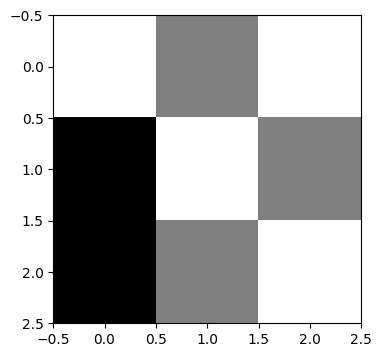

In [ ]:
plt.imshow(img)
print("Test Passed")

# Section-2: In this section we will build very basic CNN architecture, Compile and train our CNN model.

This will be further divided into following sections:


## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [2]:
data_dir = "/content/drive/MyDrive/ml/FruitinAmazon/train"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    seed=123,
    validation_split=0.2,
    subset='training',
)

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    shuffle=False,
    seed=123,
    validation_split=0.2,
    subset='validation',
)

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [7]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


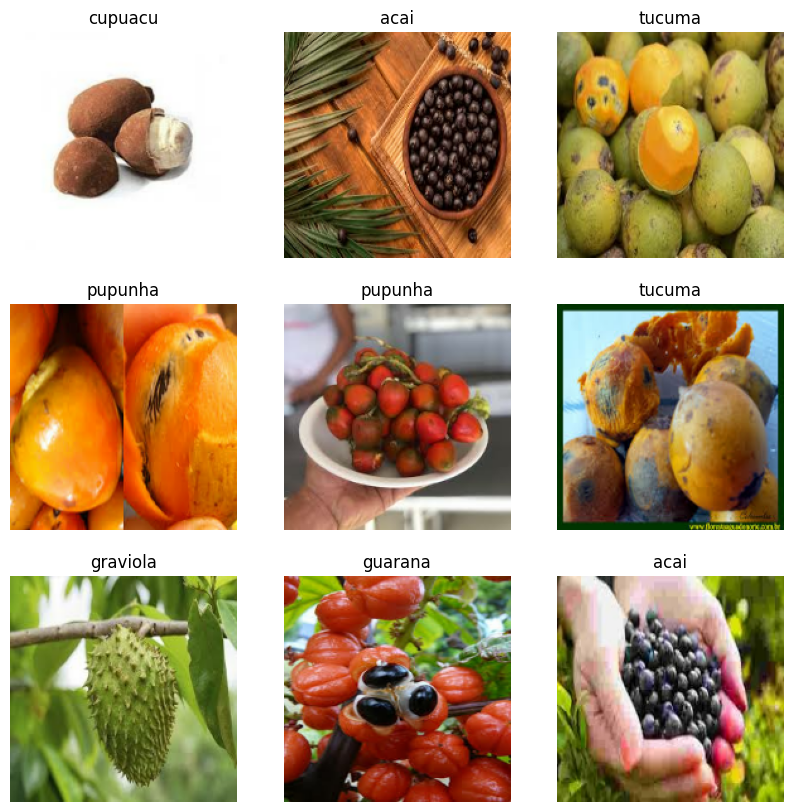

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


## Design CNN Architecture:

For this task, we will build a CNN with following layers:

Feature-Extraction and Convolution Operations.
1.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
2.   Pooling layer[max, F=(2,2), S=2].
3.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
4.   Pooling layer[max, F=(2,2), S=2].

Classification-Assigning a class probabilities to each classes.
1.   Flatten Layer()
2.   Hidden/Dense Layer [number of neurons=128].
3.   Output Layer [number of neurons=num_classes].


### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [10]:
def generate_model(image_height, image_width, nchannels, num_classes):
    """
    This function will generate a model with the set of hyperparameters defined above.

    Input Args:
    image_height[int] = Height of an image.
    image_width[int] = Width of an image.
    nchannels[int] = Number of channels in image.
    num_classes[int] = Number of classes in dataset.

    Output Args:
    model-> A CNN model.
    """
    model = tf.keras.Sequential([
        # Rescaling and input layer [For Keras the input shape must be (image height, image width, channels)]
        layers.Rescaling(1./255, input_shape=(image_height, image_width, nchannels)),

        # First Block of Convolution and Pooling Operations.
        layers.Conv2D(32, (3, 3), activation='relu'),  # 32 filters, 3x3 kernel size, ReLU activation
        layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer with 2x2 pool size

        # Second Block of Convolution and Pooling Operations.
        layers.Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel size, ReLU activation
        layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer with 2x2 pool size

        # Third Block of Convolution and Pooling Operations (Optional, can be added for deeper model).
        layers.Conv2D(128, (3, 3), activation='relu'),  # 128 filters, 3x3 kernel size, ReLU activation
        layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer with 2x2 pool size

        # Fully connected classifier.
        layers.Flatten(),  # Flatten the input to prepare for Dense layer
        layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units, ReLU activation
        layers.Dense(num_classes, activation='softmax')  # Output layer with units equal to the number of classes, Softmax for multi-class classification
    ])

    return model


img_height = 180
img_width = 180

In [11]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,750 (25.36 MB)

 Trainable params: 6,647,750 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

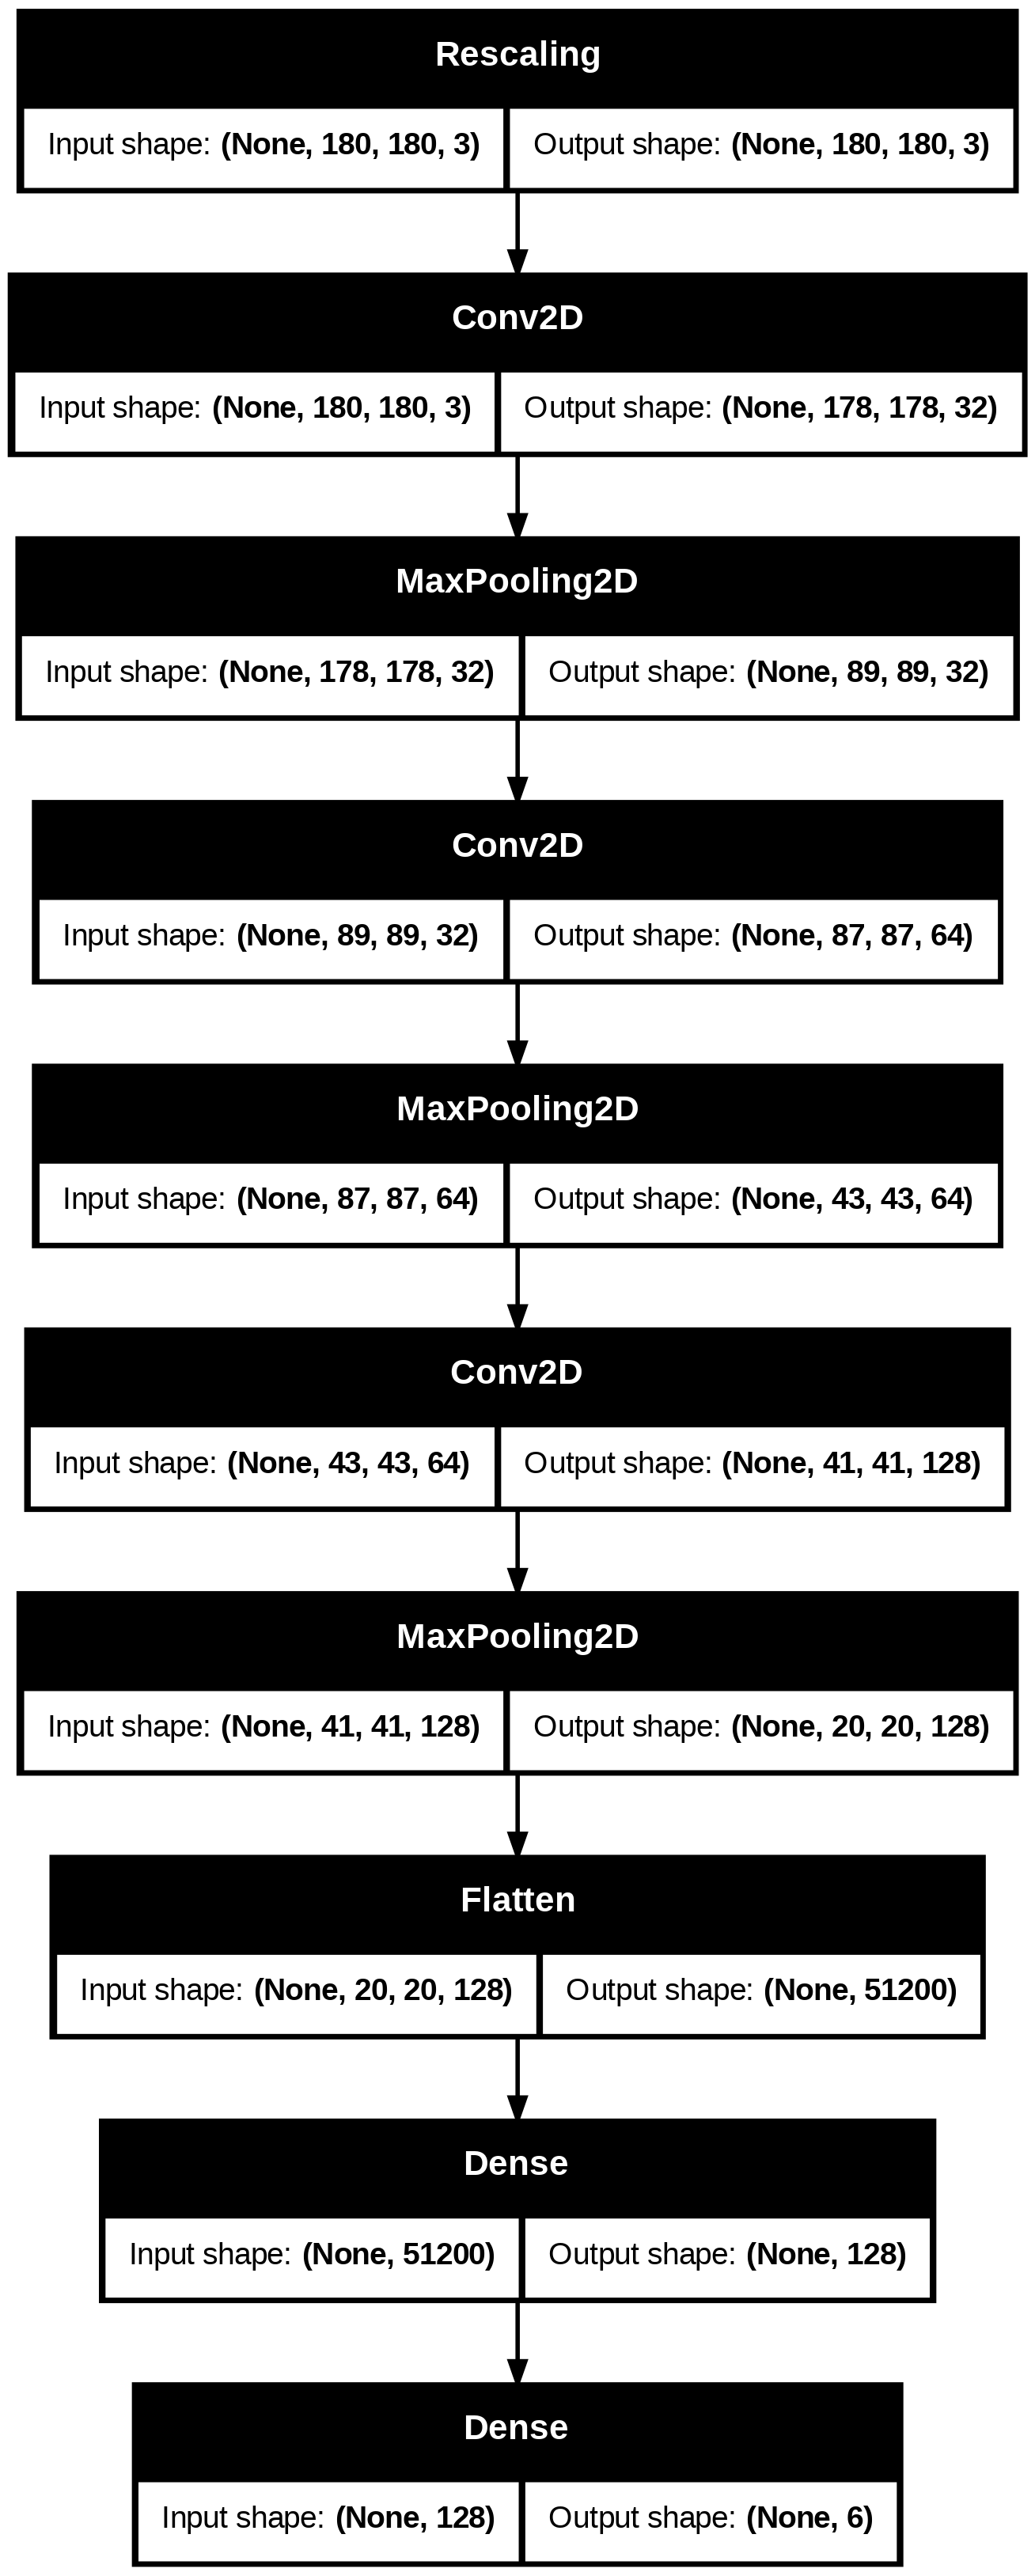

In [13]:
keras.utils.plot_model(model, show_shapes=True)

## Compile and Train Model.

Once we built the model, we need to compile the model before we start training.

In Model compilation, we do the following:
*   Checks for format Error.
*   Defines the loss function.
*   Defines the optimizer.
*   Defines the learning rate.
*   Defines the metrics we will be using.

For training our model we will be using:
*   loss --> SparseCategoricalCrossEntropy.
*   Optimizer --> Adam.
*   Evaluation Metric --> Accuracy.


In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.2222 - loss: 3.3413 - val_accuracy: 0.0000e+00 - val_loss: 3.6536
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1545 - loss: 2.0276 - val_accuracy: 0.0000e+00 - val_loss: 1.7882
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4249 - loss: 1.6569 - val_accuracy: 0.2778 - val_loss: 1.8953
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4592 - loss: 1.4693 - val_accuracy: 0.8333 - val_loss: 1.4231
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6602 - loss: 1.2359 - val_accuracy: 0.3333 - val_loss: 1.7463
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5660 - loss: 1.0642 - val_accuracy: 0.6667 - val_loss: 1.0333
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8316 - loss: 0.7837 - val_accuracy: 0.8333 - val_loss: 0.9297
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8776 - loss: 0.5312 - val_accuracy: 0.8333 - val_loss: 0.6390
Epoch 9

## Observe the Model Performance.


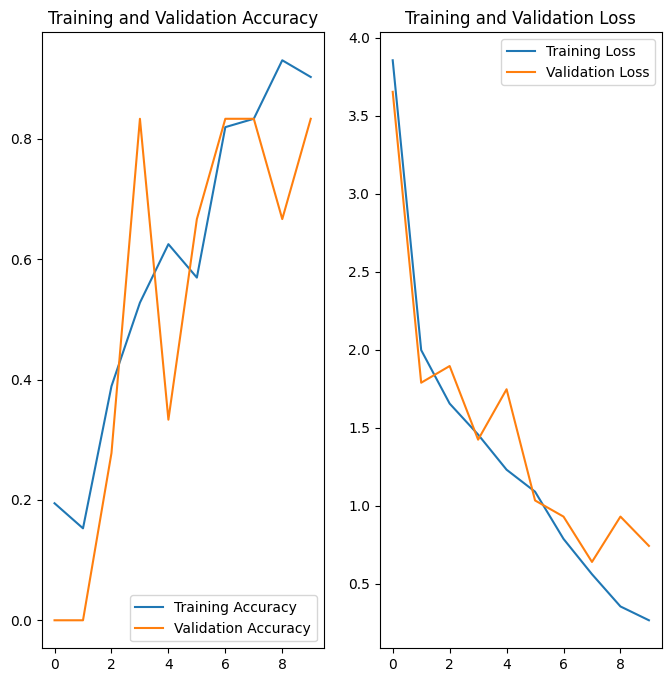

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Home Task:

Create a Test Set and Perform a model evaluation to find the test accuracy.

Based on last week built a function which predicts input examples, and also plot the result.


In [17]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/ml/FruitinAmazon/test",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    shuffle=True,
    seed=123,
)


Found 30 files belonging to 6 classes.


In [18]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds, verbose=2)

1/1 - 6s - 6s/step - accuracy: 0.6000 - loss: 1.4938


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def predict_and_plot(model, test_ds, num_examples=5):
    class_names = test_ds.class_names if hasattr(test_ds, 'class_names') else []
    test_images, test_labels = next(iter(test_ds))

    # To store the predictions and true labels for plotting results
    predicted_classes = []
    true_classes = []


    plt.figure(figsize=(15, 5))  # Adjust the figure size for better spacing

    # Randomly select some images from the test set
    for i in range(num_examples):
        img = test_images[i]
        label = test_labels[i]

        # Preprocess image for prediction
        img = tf.expand_dims(img, axis=0)

        # Make prediction
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        predicted_class_name = class_names[predicted_class]
        true_class_name = class_names[label.numpy()]

        # Store predictions and true labels for further analysis
        predicted_classes.append(predicted_class)
        true_classes.append(label.numpy())


        # Plot the image with prediction and true label
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(test_images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {predicted_class_name}\nTrue: {true_class_name}")
        plt.axis('off')

    # Plot the confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Plot the accuracy distribution or other result metrics (optional)
    plt.figure(figsize=(8, 6))
    accuracy = np.mean(np.array(true_classes) == np.array(predicted_classes))
    plt.bar(["Accuracy"], [accuracy], color="green")
    plt.ylim(0, 1)
    plt.title("Test Accuracy")
    plt.ylabel("Accuracy")
    plt.show()

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


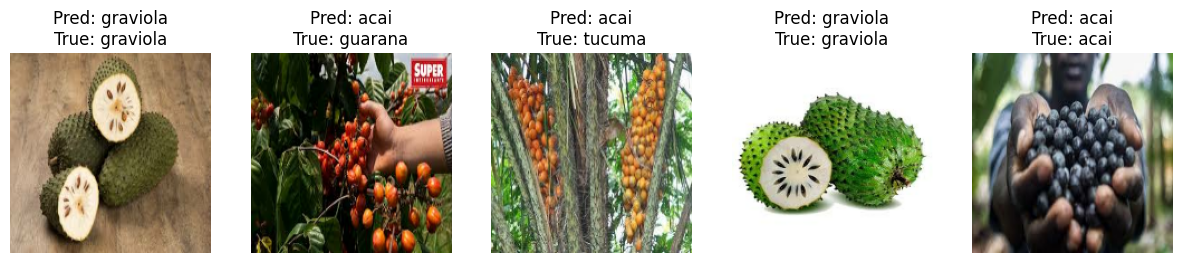

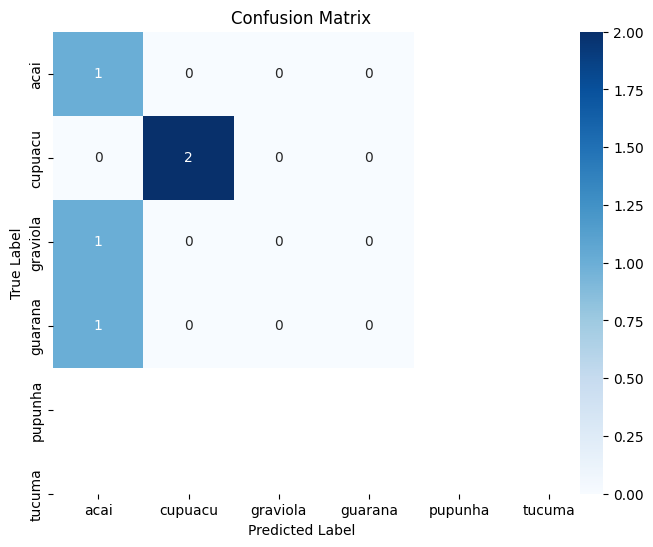

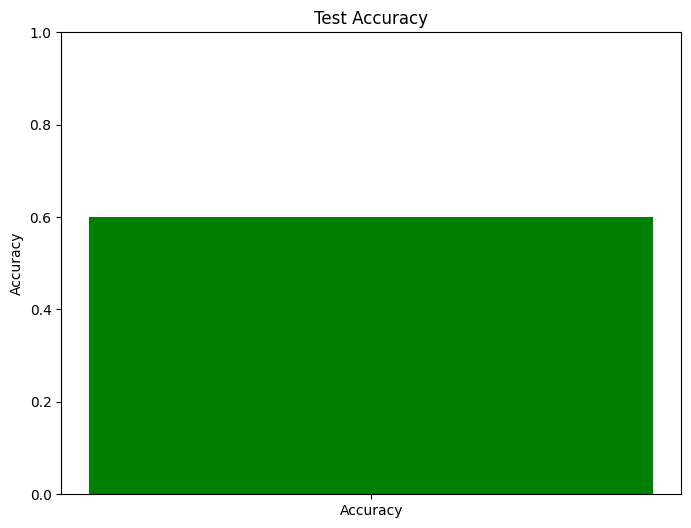

<Figure size 640x480 with 0 Axes>

In [20]:
predict_and_plot(model, test_ds)